In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split

In [100]:
#load datasets
X, y = ds.load_svmlight_file('data/australian_scale')
X = X.todense()

In [109]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)

In [110]:
#transformation trick: combine w and b together
X_train = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
X_test = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((483, 15), (483,), (207, 15), (207,))

In [111]:
#param init:all zeros
def zeroInit():
    #[w b]^T
    return np.zeros(X_train.shape[1])

# define loss
def loss(X, y, w, C):
    return 1/2 * np.sum(np.square(w[:-1])) + C * np.sum(hingeLoss(X, y, w))

# define metric
def accuracy(y_true, y_pred):
    return np.sum(y_true==y_pred) / len(y_true)

#define hinge loss
def hingeLoss(X, y, w):
    #cannot use np.max here: two arrays
    return np.maximum(0, 1-np.multiply(y, np.dot(X, w)))

#cal gradients
def gradient(X, y, w, C):
    margin = 1-np.multiply(y, np.dot(X, w))
    minus_y = -y
    minus_y[margin<0] = 0
    res = w + C * np.dot(X.T, minus_y)
    res[-1] -= w[-1] #b
    return res

# define prediction
def predict(X, w, threshold):
    res = np.dot(X, w)
    res[res>=threshold] = 1
    res[res<threshold] = -1
    return res

In [116]:
#initialize w, b
w = zeroInit()

learning_rate = 0.0001
iter_num = 2000
C = 0.01
threshold = 0

#store losses
train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

#start training process
for i in range(iter_num):
    train_loss = loss(X_train, y_train, w, C)
    train_loss_history.append(train_loss)
    test_loss = loss(X_test, y_test, w, C)
    test_loss_history.append(test_loss)
    
    train_accuracy = accuracy(y_train, predict(X_train, w, threshold))
    train_accuracy_history.append(train_accuracy)
    test_accuracy = accuracy(y_test, predict(X_test, w, threshold))
    test_accuracy_history.append(test_accuracy)
    
    print('iter ' + str(i) + ':', train_loss, test_loss, test_accuracy)
    w -= learning_rate * gradient(X_train, y_train, w, C)

iter 0: 4.83 2.07 0.391304347826
iter 1: 4.82797722662 2.06906021636 0.840579710145
iter 2: 4.82595485585 2.0681207266 0.840579710145
iter 3: 4.82393288761 2.06718153065 0.840579710145
iter 4: 4.82191132183 2.06624262844 0.840579710145
iter 5: 4.81989015841 2.06530401989 0.840579710145
iter 6: 4.81786939729 2.06436570496 0.840579710145
iter 7: 4.81584903837 2.06342768355 0.840579710145
iter 8: 4.81382908159 2.0624899556 0.840579710145
iter 9: 4.81180952685 2.06155252105 0.840579710145
iter 10: 4.80979037409 2.06061537982 0.840579710145
iter 11: 4.80777162321 2.05967853184 0.840579710145
iter 12: 4.80575327414 2.05874197705 0.840579710145
iter 13: 4.8037353268 2.05780571537 0.840579710145
iter 14: 4.8017177811 2.05686974673 0.840579710145
iter 15: 4.79970063697 2.05593407107 0.840579710145
iter 16: 4.79768389433 2.05499868832 0.840579710145
iter 17: 4.7956675531 2.0540635984 0.840579710145
iter 18: 4.79365161319 2.05312880125 0.840579710145
iter 19: 4.79163607453 2.0521942968 0.84057971

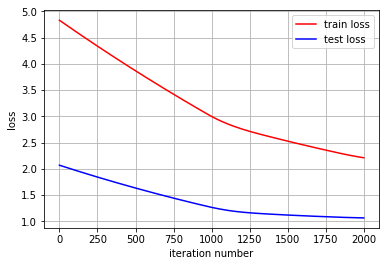

In [113]:
#plotting block
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('iteration number')
plt.ylabel('loss')
plt.plot(range(iter_num), train_loss_history,'r', label='train loss')  
plt.plot(range(iter_num), test_loss_history,'b',label='test loss')  
plt.legend()
plt.grid()
plt.show()

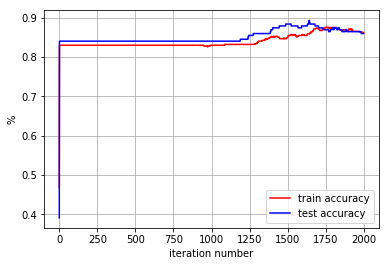

In [114]:
#plotting accuracy
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('iteration number')
plt.ylabel('%')
plt.plot(range(iter_num), train_accuracy_history,'r', label='train accuracy')  
plt.plot(range(iter_num), test_accuracy_history,'b',label='test accuracy')  
plt.legend()
plt.grid()
plt.show()